# Ejemplo de clasificación

**En todos los problemas de clasificación (o aprendizaje supervisado), el primer paso después de preparar el conjunto de datos es separar los datos en un conjunto de prueba y un conjunto de entrenamiento y, opcionalmente, un conjunto de validación. La idea es hacer que
que el modelo aprenda entrenando en el conjunto de datos de entrenamiento, evaluarlo y ajustarlo en el conjunto de datos de validación, o utilizar
técnicas como la validación cruzada y, finalmente, comprobar su rendimiento en el conjunto de datos de prueba.** 

La evaluación de un modelo es una parte crítica de cualquier solución de aprendizaje automático. Por lo tanto, como regla general, debemos recordar siempre que la evaluación real de un algoritmo de
de Aprendizaje Automático se realiza siempre sobre los datos que no ha visto previamente (incluso la validación cruzada sobre el conjunto de datos de entrenamiento utilizará una parte de los datos de entrenamiento).

**A veces utilizamos todo el conjunto de datos para entrenar el modelo y luego utilizamos un subconjunto de ellos como conjunto de prueba.
Este es un error común que se comete a menudo en el aprendizaje automático. Un modelo debe generalizar bien y rendir bien en datos que nunca ha visto antes.**

**Una buena métrica de evaluación en datos de entrenamiento pero un mal rendimiento en datos no vistos (de validación o de prueba) significa que el algoritmo ha fallado, no ha logrado producir una solución generalizada para el problema** 

Para nuestro ejemplo de clasificación, utilizaremos un popular problema de clasificación multiclase, el reconocimiento de dígitos escritos a mano. Los datos para el mismo están disponibles como parte de la biblioteca scikit-learn.

El problema aquí es predecir el valor real del dígito a partir de una imagen manuscrita de un dígito. 

En el conjunto de datos tenemos un vector de características de 1x64, que contiene la representación de una imagen en escala de grises del dígito escrito a mano.

Antes de proceder a la construcción de cualquier modelo, veamos primero cómo son los datos y la imagen que pretendemos
analizar. El siguiente código carga los datos de la imagen contenida en el índice 10 y los dibuja.

In [1]:
from sklearn import datasets, metrics
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
digits = datasets.load_digits()

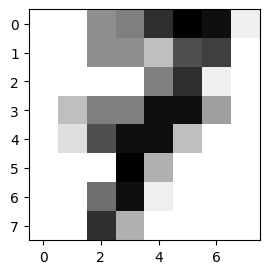

In [4]:
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[7], cmap=plt.cm.gray_r) #imagen al azar

## ¿Cómo es la matriz de datos?

In [5]:
digits.images[7] #convertir una imagen en un mapa de pixeles

array([[ 0.,  0.,  7.,  8., 13., 16., 15.,  1.],
       [ 0.,  0.,  7.,  7.,  4., 11., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  1.,  0.],
       [ 0.,  4.,  8.,  8., 15., 15.,  6.,  0.],
       [ 0.,  2., 11., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 13.,  5.,  0.,  0.,  0.,  0.]])


## Vector de características

In [6]:
digits.data[7]

array([ 0.,  0.,  7.,  8., 13., 16., 15.,  1.,  0.,  0.,  7.,  7.,  4.,
       11., 12.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  4.,
        8.,  8., 15., 15.,  6.,  0.,  0.,  2., 11., 15., 15.,  4.,  0.,
        0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
        1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.])

## Variable objetivo

In [7]:
digits.target[6] # Valor del digito de 0 a 9

6

Para este ejemplo utilizaremos
un modelo de regresión logística para hacer esta clasificación. Antes de proceder a la construcción del modelo, dividiremos
el conjunto de datos en conjuntos separados de prueba y de entrenamiento. El tamaño del conjunto de prueba suele depender de la cantidad total de datos disponibles. En nuestro ejemplo, utilizaremos un conjunto de prueba que representa el 30% del conjunto de datos. El total de
puntos de datos en cada conjunto de datos se muestra para facilitar la comprensión

In [8]:
X_digits = digits.data
y_digits = digits.target

num_data_points = len(X_digits)
cut = int(.7 * num_data_points)
cut

1257

In [9]:
X_train = X_digits[:cut]
y_train = y_digits[:cut]
X_test = X_digits[cut:]
y_test = y_digits[cut:]
print(X_train.shape, X_test.shape)

(1257, 64) (540, 64)


In [10]:
y_test

array([4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4,
       8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5,
       0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2,
       6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0,
       1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0,
       5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8,
       4, 9, 0, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9,
       8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9,
       6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8,
       9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,

El siguiente paso en el proceso es especificar el modelo que vamos a utilizar y los
valores de los hiperparámetros, que no dependen de los datos subyacentes y normalmente se establecen antes del entrenamiento del modelo y se ajustan para extraer el mejor modelo.

Por el momento, utilizaremos los valores por defecto cuando inicializamos el estimador del modelo y ajustamos nuestro modelo con el conjunto de entrenamiento.

In [11]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(max_iter=1000, solver='liblinear')
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html 

solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’

max_iter=100

Esto es todo lo que se necesita en scikit-learn para ajustar un modelo como la regresión logística. En el primer paso, identificamos
el modelo que queríamos utilizar. A continuación
llamamos al método de ajuste de ese objeto con nuestros datos de entrenamiento y sus etiquetas de salida. El método de ajuste actualiza
el objeto **modelo** con los parámetros aprendidos. Luego, utilizamos el método de puntuación del objeto para
determinar la precisión del modelo ajustado en nuestro conjunto de prueba. 

**Así, el modelo que desarrollamos sin ningún ajuste intensivo es un 90% preciso en la predicción de los dígitos escritos a mano.**

In [12]:
print('Logistic Regression mean accuracy: %f' % logistic.score(X_test, y_test))  # 90% de las veces acertó en la predicción con el digito que decia el set de test 

Logistic Regression mean accuracy: 0.900000


# Ejemplo de Clustering

En este ejemplo, utilizaremos un conjunto de datos etiquetados para ayudarnos a ver los resultados del modelo de clustering y compararlo
con las etiquetas reales. Un punto a recordar aquí es que, normalmente los datos etiquetados **no están disponibles en el mundo real**,
por lo que optamos por métodos no supervisados como el clustering. 

Intentaremos cubrir dos algoritmos diferentes, uno de clustering basado en la partición y otro de clustering jerárquico.

Los datos que utilizaremos pertenecen al muy popular conjunto de datos Wisconsin Diagnostic Breast Cancer. 

Este conjunto de datos tiene 30
atributos o características y una etiqueta correspondiente para cada punto de datos que indica si tiene cáncer
(maligno: valor de la etiqueta 0) o no tiene cáncer (benigno: valor de la etiqueta 1). Cargamos los datos utilizando el siguiente código.

In [13]:
import numpy as np
from sklearn.datasets import load_breast_cancer

# load data
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, data.feature_names)

(569, 30) ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# Clustering basado en particiones


Para nuestro ejemplo, elegiremos el modelo de clustering basado en particiones más simple pero más popular, que
es el algoritmo K-means. Este algoritmo está basado en el concepto de centroide y comienza con alguna
suposición sobre el total de clusters en los datos y con centroides aleatorios asignados a cada uno de los clusters.
A continuación, reasigna cada punto de datos al centroide más cercano a él, utilizando la distancia euclidea como métrica de distancia.

Después de cada reasignación, vuelve a calcular el centroide de ese clúster. Todo el proceso se repite de forma iterativa
y se detiene cuando la reasignación de los puntos de datos no cambia los centroides de los clusters. 

Como ya sabemos por las etiquetas de los datos que tenemos dos posibles tipos de categorías: 0 o 1,
el siguiente código intenta determinar estos dos clusters a partir de los datos aprovechando la agrupación de K-means.

En el mundo real, este no es siempre el caso, ya que no conoceremos el posible número de clusters. Este es uno de los
de las desventajas más importantes del clustering de K-means.

### ¿Qué es KMeans?
KMeans es un algoritmo de clustering no supervisado que agrupa datos en k clusters (grupos). El objetivo es minimizar la distancia entre los puntos de un grupo y su centroide, lo que asegura que los datos dentro de un cluster sean lo más similares posible.



### KMeans sigue estos pasos básicos:

1)Selecciona aleatoriamente k centroides (uno para cada cluster). 

2)Asigna cada punto de datos al cluster cuyo centroide está más cercano.

3)Recalcula los centroides como la media de los puntos asignados a cada cluster.

4)Repite los pasos 2 y 3 hasta que los centroides no cambien significativamente o se alcance el número máximo de iteraciones.

#### Hiperparámetro principal: k (número de clusters)
El número de clusters, k, debe especificarse antes de entrenar el modelo.
Elegir un valor adecuado para k es crítico. Métodos como el Codo (Elbow Method) o Silhouette Score se usan para determinar el mejor número de clusters.

#### Limitaciones
Sensibilidad a la inicialización: La elección inicial de los centroides puede influir en el resultado. Esto se mitiga usando múltiples inicializaciones (n_init) y seleccionando el mejor resultado.
Clusters esféricos: KMeans funciona mejor si los clusters tienen formas esféricas o compactas.
Outliers: Es sensible a los outliers, que pueden distorsionar los centroides.

In [14]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=2)
km.fit(X)

labels = km.labels_
centers = km.cluster_centers_
print(labels[:10])

[1 1 1 0 1 0 1 0 0 0]


In [15]:
labels

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Una vez completado el proceso de ajuste, podemos obtener los centroides y etiquetas de nuestros dos clusters en el conjunto de datos utilizando los atributos. Los centroides se refieren aquí a algún valor numérico de las dimensiones de los datos
(los 30 atributos del conjunto de datos) en torno a los cuales se agrupan los datos.
¿Podemos visualizar y comparar los clusters con las etiquetas reales? Visualizar los clusters en un espacio de características de 30 dimensiones sería imposible de interpretar
o incluso de dibujar. Por lo tanto, aprovecharemos el PCA para reducir las dimensiones de entrada a dos componentes principales
y visualizar los clusters sobre los mismos. 

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
bc_pca = pca.fit_transform(X)

Los dos primeras componentes principales nos permiten visualizar los clusters en 2 dimensiones

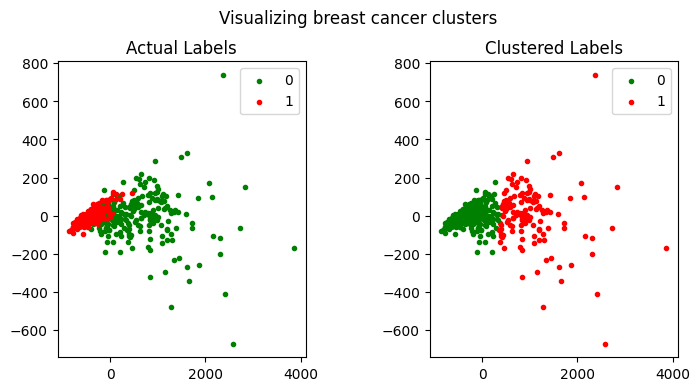

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Clustered Labels')

for i in range(len(y)): #originales
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
         
    if labels[i] == 0: #predichos
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if labels[i] == 1:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')

l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['0', '1'])

¿Qué se puede interpretar del gráfico anterior?

Todos los rojos que "sobran" en el segundo grafico son 1 y deberían ser cero 

------------------------------------------------------------

# Clustering jerárquico


Podemos utilizar los mismos datos para realizar un clustering jerárquico y ver si los resultados cambian mucho en comparación con el clustering de K-means y las etiquetas reales. En scikit-learn tenemos varias interfaces
como la clase AgglomerativeClustering para realizar clustering jerárquico.

El clustering aglomerativo es un clustering jerárquico que utiliza un enfoque
de abajo hacia arriba, es decir, cada observación comienza en su propio clúster y los clústeres se fusionan sucesivamente. Los criterios de fusión se pueden utilizar a partir de un conjunto de vínculos candidatos; la selección del vínculo rige la estrategia de fusión. 

Como ya tenemos el conjunto de características del
de cáncer de mama en la variable X, el siguiente código nos ayuda a calcular la matriz de vinculación utilizando el criterio de varianza mínima de Ward.

linkage: Calcula la matriz de enlaces que describe el proceso de agrupamiento jerárquico.

dendrogram: Se utiliza para visualizar el clustering jerárquico como un árbol (dendrograma).

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage 
import numpy as np
np.set_printoptions(suppress=True)

Z = linkage(X, 'ward')
print(Z)

[[  287.           336.             3.81596727     2.        ]
 [  106.           420.             4.11664267     2.        ]
 [   55.           251.             4.93361024     2.        ]
 ...
 [ 1130.          1132.          6196.07482529    86.        ]
 [ 1131.          1133.          8368.99225244   483.        ]
 [ 1134.          1135.         18371.10293626   569.        ]]


Al ver el resultado anterior, podría pensar ¿qué indica esta matriz de vinculación? Se puede pensar como un mapa histórico completo, que mantiene un registro de los puntos de datos que se fusionaron
en qué clúster durante cada iteración. Si tiene n puntos de datos, la matriz de vinculación, Z, tendrá una forma de
(n - 1) x 4 donde $Z[i]$ nos dirá qué clusters se fusionaron en la iteración i.

Cada fila tiene cuatro elementos,Los dos primeros elementos son identificadores de puntos de datos o etiquetas de clusters, el tercer elemento es la distancia del cluster entre los dos primeros elementos
(ya sean puntos de datos o clusters), y el último elemento es el número total de elementos\ puntos de datos en el
clúster una vez que se ha completado la fusión.

Le recomendamos que consulte https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html, que explica esto en detalle. La mejor
manera de visualizar estas fusiones basadas en la distancia es utilizar un dendrograma

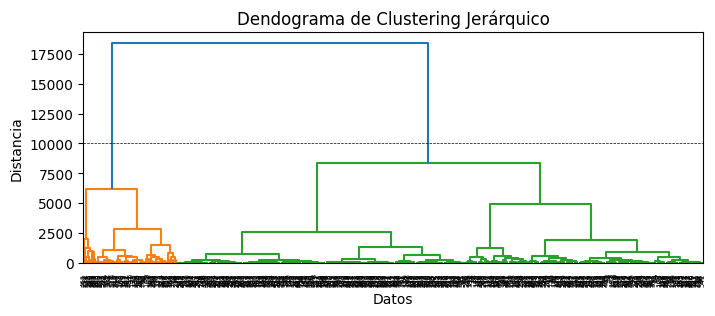

In [20]:
plt.figure(figsize=(8, 3))
plt.title('Dendograma de Clustering Jerárquico')
plt.xlabel('Datos')
plt.ylabel('Distancia')
dendrogram(Z)
plt.axhline(y=10000, c='k', ls='--', lw=0.5)
plt.show()

Podemos ver cómo cada punto de datos comienza como un cluster individual
y poco a poco empieza a fusionarse con otros puntos de datos para formar clusters. En un nivel alto, a partir de los colores y
dendrograma, se puede ver que el modelo ha identificado correctamente dos clústeres principales si se considera una
distancia de alrededor de 10000 o más. Aprovechando esta distancia, podemos obtener las etiquetas de los clusters utilizando el
siguiente código.

In [21]:
from scipy.cluster.hierarchy import fcluster

max_dist = 10000
hc_labels = fcluster(Z, max_dist, criterion='distance')

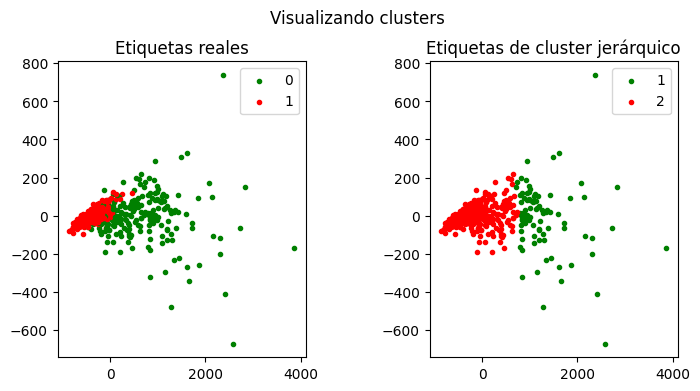

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizando clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Etiquetas reales')
ax2.set_title('Etiquetas de cluster jerárquico')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
    if hc_labels[i] == 1:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if hc_labels[i] == 2:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')

l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['1', '2'])

# Evaluación de modelos

¿Cómo podemos juzgar si un modelo es bueno o
malo? El hecho de que hayamos desarrollado algo elegante utilizando un algoritmo de renombre, no garantiza que su
rendimiento sea bueno. La evaluación del modelo es la respuesta a estas preguntas y es una parte esencial de todo el proceso de aprendizaje automático. 

Sobre la base de la evaluación del modelo y las comparaciones posteriores, podemos podemos decidir si continuamos con nuestros esfuerzos de mejora del modelo o los abandonamos, y qué modelo debe seleccionarse como el modelo final que se utilizará.

La evaluación del modelo también nos ayuda en el importante proceso de
proceso de ajuste de los hiperparámetros del modelo y también a la hora de decidir escenarios como, por ejemplo, si la función inteligente
que acabamos de desarrollar añade algún valor a nuestro modelo o no. 

Lo ideal es tener alguna medida numérica o métrica de la eficacia de un modelo
y utilizar esa medida para clasificar y seleccionar los modelos. Esta será una de las principales formas de evaluar
modelos, pero también debemos tener en cuenta que muchas veces estas métricas de evaluación pueden no capturar los
criterios de éxito necesarios para el problema que estamos tratando de resolver. En estos casos, tendremos que ser imaginativos y adaptar estas métricas a nuestro problema y utilizar elementos como las restricciones y los objetivos de negocio.

Las métricas de evaluación de los modelos dependen en gran medida del tipo de modelo que tengamos, por lo que las métricas de los modelos de regresión
serán diferentes de las de los modelos de clasificación o de los modelos de clustering. 

## Métricas de evaluación para modelos de Clasificación

Existen varias métricas que pueden utilizarse para evaluar los modelos de clasificación, veremos las principales. Utilizamos los modelos que hemos desarrollado anteriormente para ilustrarlas
en detalle. 

Preparamos los conjuntos de datos de entrenamiento y de prueba para construir nuestros modelos de clasificación. Aprovechamos las variables X e y ya definidas, que contienen los datos y las etiquetas de las observaciones del conjunto de datos del cáncer de mama.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


In [24]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()


## Matriz de confusión

La matriz de confusión es una de las formas más populares de evaluar un modelo de clasificación. Aunque la matriz por
por sí misma no es una métrica, la representación matricial puede utilizarse para definir una variedad de métricas, todas las cuales se vuelven
importantes en algún caso o escenario específico. Se puede crear una matriz de confusión tanto para una clasificación binaria como
como para un modelo de clasificación multiclase.
Una matriz de confusión se crea comparando la etiqueta de clase predicha de un punto de datos con su etiqueta de clase real.
real. Esta comparación se repite para todo el conjunto de datos y los resultados de esta comparación se compilan
en un formato matricial o tabular. 

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [26]:
y_pred = logistic.predict(X_test)

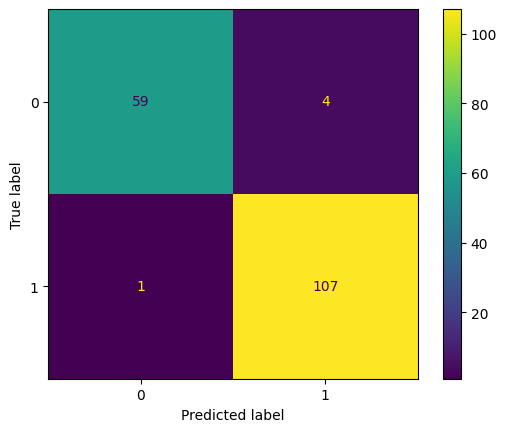

In [27]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

## Entender la matriz de confusión
Entender la matriz de confusión no es tan confuso
una vez que se entienden los fundamentos. Es una estructura tabular que permite llevar un registro de las clasificaciones correctas y de las erróneas. Esto es útil para
evaluar el rendimiento de un modelo de clasificación para el que conocemos las etiquetas de datos verdaderas y podemos compararlas con las etiquetas de datos predichas.
Cada columna de la matriz de confusión representa el número de instancias clasificadas basadas en las predicciones del modelo y cada fila de la matriz representa los recuentos de instancias basados en las etiquetas de clase verdaderas.

En un problema típico de clasificación binaria, solemos tener una etiqueta de clase que se define como la
clase positiva, que es básicamente la clase que nos interesa. Por ejemplo, en nuestro conjunto de datos sobre el cáncer de mama, digamos que estamos interesados en detectar o predecir cuando el paciente no tiene cáncer de mama (benigno). Entonces la etiqueta 1
es nuestra clase positiva. Sin embargo, supongamos que nuestra clase de interés fuera detectar el cáncer (maligno), entonces podríamos
haber elegido la etiqueta 0 como nuestra clase positiva. La figura siguiente muestra una matriz de confusión típica para un problema de clasificación binaria
binaria, en la que p representa la clase positiva y n la clase negativa.


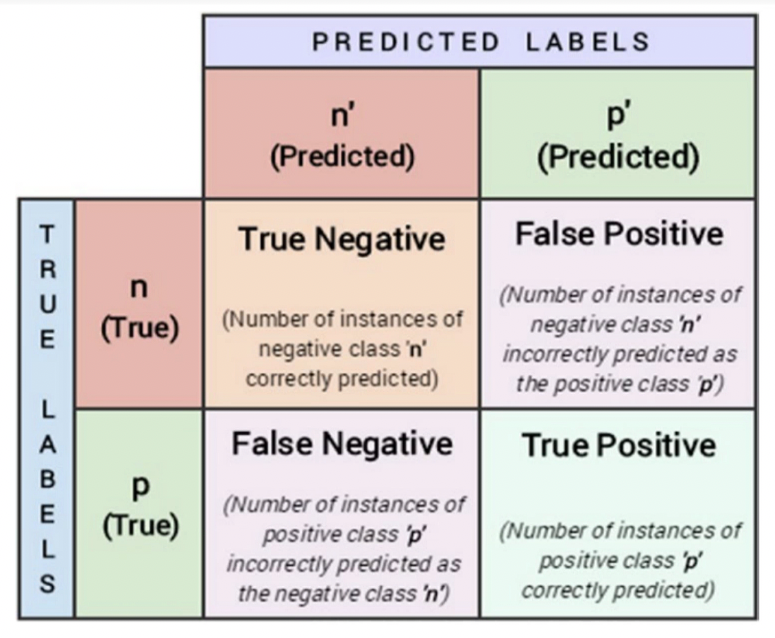

## True Positive, False Positive, True Negative & False Negative

In [28]:
positive_class = 1
TP = 107
FP = 4
TN = 59
FN = 1

$accuracy = \frac{TP + TN}{TP + FP + TN + FN}$

In [29]:
from sklearn.metrics import accuracy_score

fw_acc = round(accuracy_score(y_true=y_test, y_pred=y_pred), 5)
mc_acc = round((TP + TN) / (TP + TN + FP + FN), 5)
print('sklearn Accuracy:', fw_acc)
print('Manually Computed Accuracy:', mc_acc)

sklearn Accuracy: 0.97076
Manually Computed Accuracy: 0.97076


$precision = \frac{TP}{TP + FP}$ 

Número de predicciones realizadas que son realmente correctas o relevantes
de todas las predicciones basadas en la clase positiva.

In [30]:
from sklearn.metrics import precision_score

fw_prec = round(precision_score(y_true=y_test, y_pred=y_pred), 5)
mc_prec = round((TP) / (TP + FP), 5)
print('sklearn Precision:', fw_prec)
print('Manually Computed Precision:', mc_prec)

sklearn Precision: 0.96396
Manually Computed Precision: 0.96396


$recall = \frac{TP}{TP + FN}$

Número de casos de la clase positiva que se predijeron correctamente. Esto es
también se conoce como tasa de aciertos, cobertura o sensibilidad.

In [31]:
from sklearn.metrics import recall_score

fw_rec = round(recall_score(y_true=y_test, y_pred=y_pred), 5)
mc_rec = round((TP) / (TP + FN), 5)
print('Framework Recall:', fw_rec)
print('Manually Computed Recall:', mc_rec)

Framework Recall: 0.99074
Manually Computed Recall: 0.99074


Hay algunos casos en los que queremos una optimización equilibrada de la precisión y la recuperación.
La puntuación F1 (F1-score) es una métrica que es la media armónica de la *precision* y el *recall*

$F1 = \frac{2*precision*recall}{precision + recall}$

In [32]:
from sklearn.metrics import f1_score

fw_f1 = round(f1_score(y_true=y_test, y_pred=y_pred), 5)
mc_f1 = round((2*mc_prec*mc_rec) / (mc_prec+mc_rec), 5)
print('sklearn F1-Score:', fw_f1)
print('Manually Computed F1-Score:', mc_f1)

sklearn F1-Score: 0.97717
Manually Computed F1-Score: 0.97717


## Curva ROC
ROC, que significa Receiver Operating Characteristic, es un concepto de los primeros tiempos de los radares. Este concepto
puede extenderse a la evaluación de clasificadores binarios, así como a la de clasificadores multiclase.

Puede interpretarse como la eficacia con la que el modelo puede distinguir
entre la señal real y el ruido de los datos.
La curva ROC puede crearse trazando la fracción de verdaderos positivos frente a la fracción de falsos
positivos, es decir, es un gráfico de la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR). 

Cada resultado de predicción de la matriz de confusión ocupa un punto en este espacio ROC. Idealmente, el mejor modelo de predicción daría un punto
en la esquina superior izquierda (0, 1) indicando una clasificación perfecta (100% de sensibilidad y especificidad). Una línea diagonal
representa un clasificador que hace una estimación aleatoria. 

Idealmente, si su curva ROC se encuentra en la mitad superior del gráfico
tiene un clasificador decente que es mejor que la media. Siempre se puede aprovechar la función roc_curve
proporcionada por scikit-learn para generar los datos necesarios para una curva ROC.

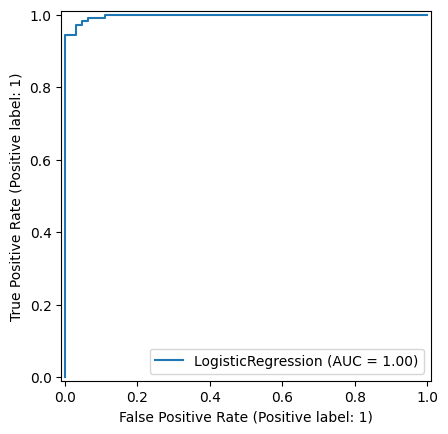

In [39]:
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay



#plot_roc_curve(estimator=logistic, X=X_test, y=y_test)
RocCurveDisplay.from_estimator(estimator=logistic, X=X_test, y=y_test)

In [40]:
from sklearn.metrics import DetCurveDisplay

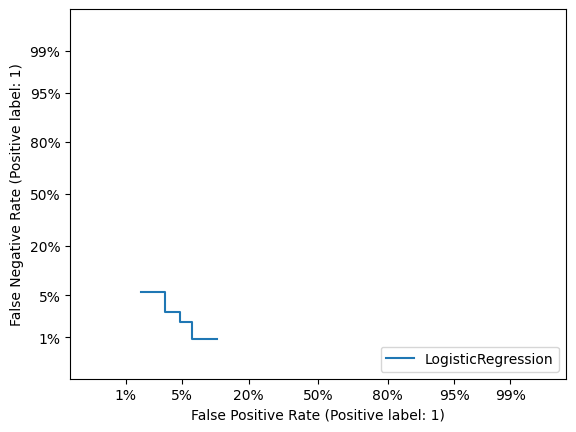

In [41]:
DetCurveDisplay.from_estimator(logistic, X_test, y_test)

En general, la curva ROC es una herramienta importante para interpretar visualmente los modelos de clasificación. Pero no nos proporciona directamente un valor numérico que podamos utilizar para
comparar modelos. La métrica que realiza esa tarea es el Área Bajo la Curva, conocida popularmente como AUC. 

El clasificador ideal tendrá la unidad de área bajo la curva. Basándonos en este valor podemos comparar dos modelos, generalmente
el modelo con la mejor puntuación AUC es mejor.


In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
roc_auc_score(y_test,y_pred)

0.9636243386243386

In [43]:
def plot_roc_curve(fpr, tpr, roc_auc):  
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('(ROC) Curve')
    plt.legend()
    plt.show()

AUC:  0.9636243386243386


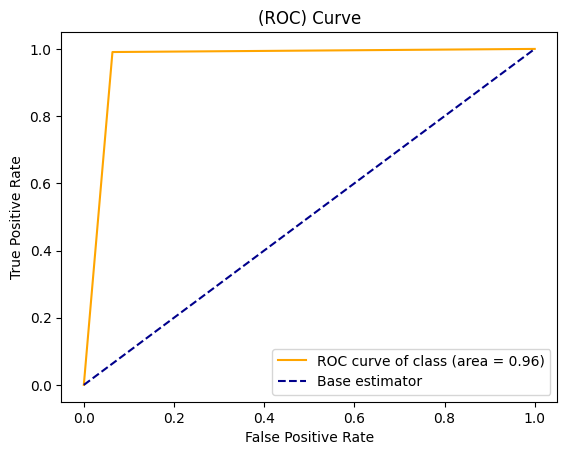

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

# Métricas de evaluación para clustering



Cuando se trata de evaluar modelos de clustering (o los modelos no supervisados en
en general) la dificultad surge de la ausencia de etiquetas verdaderas en los datos. 

Para ilustrar las métricas de evaluación con un ejemplo del mundo real, aprovecharemos el conjunto de datos de cáncer de mama
disponible en las variables X para los datos e y para las etiquetas de observación. También utilizaremos el algoritmo K-means
para ajustar dos modelos a estos datos -uno con dos clusters y el segundo con cinco clusters- y evaluar su rendimiento.

In [45]:
km2 = KMeans(n_clusters=2, random_state=42).fit(X)
km2_labels = km2.labels_

km5 = KMeans(n_clusters=5, random_state=42).fit(X)
km5_labels = km5.labels_

## Validación externa
La validación externa consiste en validar el modelo de clustering cuando se dispone de datos reales
como datos etiquetados. 

Basándonos en esto, podemos aprovechar varias métricas
para validar el rendimiento del clustering cuando disponemos de las verdaderas etiquetas:

*   Homogeneidad: si todos
sus clusters contienen sólo puntos de datos que son miembros de una única clase (basados en las
etiquetas de clase verdaderas).
*   Completitud: si
todos los puntos de datos de una etiqueta de clase verdadera específica son también elementos del
mismo clúster.
- Medida V: La media armónica de las puntuaciones de homogeneidad y completitud nos da
el valor de la medida V.

Los valores suelen estar acotados entre 0 y 1 y normalmente los valores más altos son mejores.

In [46]:
km2_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km2_labels), 3)
km5_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km5_labels), 3)

print('Homogeneidad, Completitud, medida V clusters=2: ', km2_hcv)
print('Homogeneidad, Completitud, medida V clusters=5: ', km5_hcv)

Homogeneidad, Completitud, medida V clusters=2:  [0.422 0.517 0.465]
Homogeneidad, Completitud, medida V clusters=5:  [0.602 0.297 0.398]


#Validación interna

La validación interna consiste en validar un modelo de clustering mediante la definición de métricas que capturen el comportamiento esperado
de un buen modelo de clustering:

* Grupos compactos, es decir, los puntos de datos de un clúster se encuentran 
cerca unos de otros.
* Grupos bien separados, es decir, que dos grupos/clusters tienen la mayor distancia ellos.

Podemos definir métricas que calculen matemáticamente la *bondad* de estos dos rasgos principales y utilizarlas
para evaluar los modelos de clustering. La mayoría de estas métricas utilizarán algún concepto de distancia entre los puntos de datos.

## Coeficiente de Silhouette

Es una métrica que intenta combinar los dos requisitos de un buen modelo de agrupación. Se define para cada muestra y es una combinación de su similitud con los puntos de datos en su
de su propio clúster y su desemejanza con los puntos de datos que no están en su clúster.

Está acotado entre -1 y 1

In [47]:
from sklearn import metrics

km2_silc = metrics.silhouette_score(X, km2_labels, metric='euclidean')
km5_silc = metrics.silhouette_score(X, km5_labels, metric='euclidean')

print('Coeficiente de Silhouette num clusters=2: ', km2_silc)
print('Coeficiente de Silhouette num clusters=5: ', km5_silc)

Coeficiente de Silhouette num clusters=2:  0.6972646156059464
Coeficiente de Silhouette num clusters=5:  0.5127536688145046


# Evaluación de los modelos de regresión
Los modelos de regresión son un ejemplo de métodos de aprendizaje supervisado y, debido a la disponibilidad de las
medidas correctas (variables de respuesta numéricas de valor real), su evaluación es relativamente más fácil que
que los modelos no supervisados. Por lo general, en el caso de los modelos supervisados, se nos ofrece la posibilidad de elegir las métricas y
la decisión importante es elegir la correcta para nuestro caso de uso. Los modelos de regresión, al igual que los de clasificación
tienen un conjunto variado de métricas que se pueden utilizar para evaluarlos. 


#Coeficiente de determinación o $R^{2}$

El coeficiente de determinación mide la proporción de la varianza de la variable dependiente que es
explicada por la variable independiente. También proporciona una
medida de la probabilidad de que las muestras futuras sean predichas por el modelo.

La fórmula matemática para calcular $R^{2}$ es la siguiente, donde $\overline{y}$ es la media de la variable objetivo, $y_{i}$
indica los valores reales de esa variable y $\hat{y_{i}}$ indica los resultados predichos por el modelo.

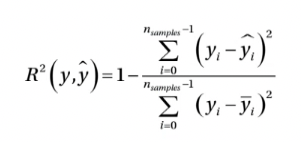


Los modelos de regresión tienen muchas más métricas que pueden utilizarse para evaluarlos, como el error absoluto de la mediana, error medio absoluto, varianza explicada, etc. Son fáciles de calcular utilizando
las funciones proporcionadas por la biblioteca scikit-learn. Sus fórmulas matemáticas son fáciles de interpretar y
tienen una comprensión intuitiva asociada a ellas. Como tarea, los animo a explorar otros conjuntos de métricas que se pueden utilizar para los modelos de regresión.

## Ejercicio

Utilizar alguno de los conjuntos de datos "de juguete" contenidos en:

https://scikit-learn.org/stable/datasets/toy_dataset.html

* Dividir el set de datos en train-test
* Elegir un modelo y entrenarlo (dependiendo del tipo de variable objetivo del conjunto)
* Utilizar los métodos de evaluación mencionados para determinar que tan bien performa el modelo
* ¿Alguno de los conjuntos podría utilizarse con un modelo de clustering? ¿Cómo harías?
